In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [89]:
filepath = r'\Users\jwuma\Downloads\EducationDataset.xlsx'
#You may have to change this to your individual filepath whenever you run this.
df = pd.read_excel(filepath)
df.head(10)

,State,PovertyRate,PopulationDensityMile,TeacherAveragePay,GDPPerCapita,TeacherUnionParticipation,UnionStrengthRanking,NAEPMathProficient,NAEPEnglishProficient,CombinedEducationQuality,PerPupilExpenditure,GDPPerCapita2014,GDPPerCapitaGrowth,logGDPPC,logGDPPC2014,UnionStrength
0,Alabama,16.1,101.0,55050,59692,0.730,20,18,21,19.5,13857,40684.372417,46.719727,4.775916,4.609428,4
1,Alaska,10.5,1.3,74870,92794,0.860,15,22,22,22.0,16979,76772.919988,20.868139,4.967520,4.885208,4
2,Arizona,12.8,65.0,59490,70346,0.310,51,26,25,25.5,11560,42578.554504,65.214627,4.847239,4.629191,1
3,Arkansas,16.3,59.0,53080,58221,0.261,48,20,25,22.5,13190,39541.336969,47.240848,4.765080,4.597051,1
4,California,12.3,250.0,92960,99329,0.907,6,25,28,26.5,16132,60700.148906,63.638808,4.997076,4.783190,5
5,Colorado,9.7,57.0,62730,90109,0.572,35,32,35,33.5,14994,57770.384952,55.977842,4.954768,4.761705,2
6,Connecticut,10.1,747.0,80230,95630,0.970,17,32,35,33.5,22022,68725.117828,39.148543,4.980594,4.837115,4
7,Delaware,11.6,529.0,68810,95038,0.892,19,19,23,21.0,21920,73522.367170,29.264064,4.977897,4.866419,4
8,District of Columbia,16.5,11131.0,76540,259954,0.627,33,20,25,22.5,18526,180827.995051,43.757608,5.414897,5.257266,2
9,Florida,13.1,422.0,63470,70799,0.525,50,21,25,23.0,12065,43322.141566,63.424516,4.850027,4.636710,1


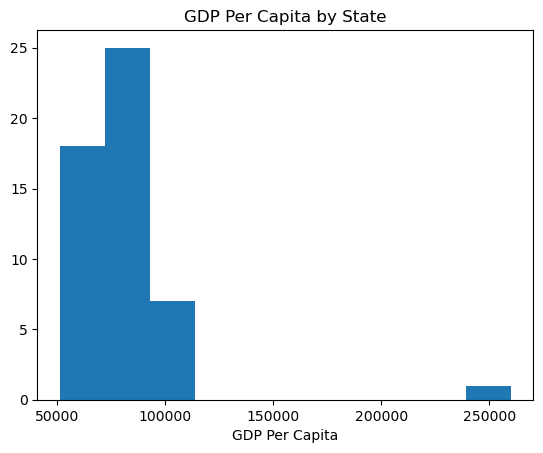

In [3]:
plt.hist(df['GDPPerCapita'])
plt.xlabel("GDP Per Capita")
plt.title("GDP Per Capita by State")
plt.show()

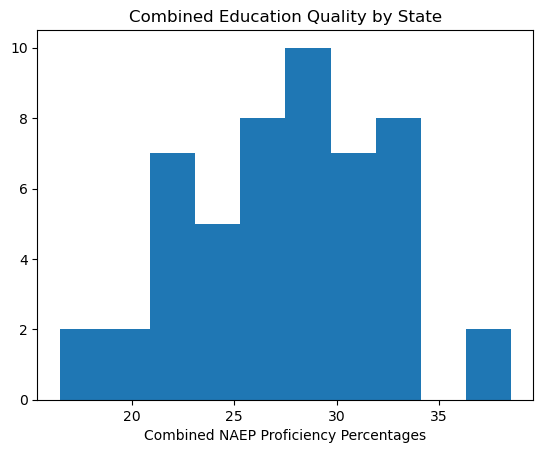

In [4]:
plt.hist(df['CombinedEducationQuality'])
plt.xlabel("Combined NAEP Proficiency Percentages")
plt.title("Combined Education Quality by State")
plt.show()

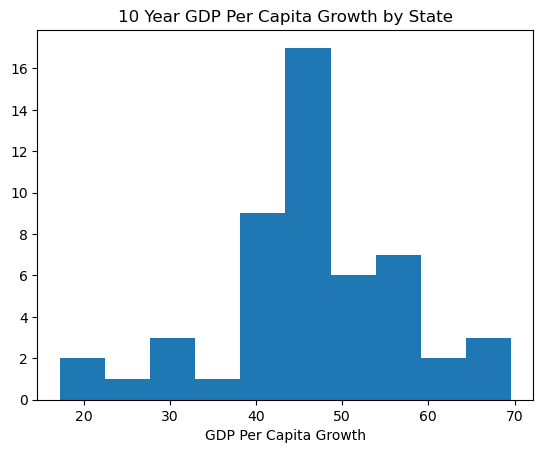

In [81]:
plt.hist(df['GDPPerCapitaGrowth'])
plt.xlabel("GDP Per Capita Growth")
plt.title("10 Year GDP Per Capita Growth by State")
plt.show()

In [6]:
df.head()
indexdf = df.drop('State',axis=1)
cleandf = indexdf.drop(index=8)
cleandf['UnionStrMem'] = cleandf['UnionStrength'] * cleandf['TeacherUnionParticipation']
cleandf['TeacherPayPoverty'] = cleandf['PovertyRate'] * cleandf['TeacherAveragePay'] 
cleandf['UnionPoverty'] = cleandf['PovertyRate'] * cleandf['TeacherUnionParticipation'] 
cleandf.head()


,PovertyRate,PopulationDensityMile,TeacherAveragePay,GDPPerCapita,TeacherUnionParticipation,UnionStrengthRanking,NAEPMathProficient,NAEPEnglishProficient,CombinedEducationQuality,PerPupilExpenditure,GDPPerCapita2014,GDPPerCapitaGrowth,logGDPPC,logGDPPC2014,UnionStrength,UnionStrMem,TeacherPayPoverty,UnionPoverty
0,16.1,101.0,55050,59692,0.730,20,18,21,19.5,13857,40684.372417,46.719727,4.775916,4.609428,4,2.920,886305.0,11.7530
1,10.5,1.3,74870,92794,0.860,15,22,22,22.0,16979,76772.919988,20.868139,4.967520,4.885208,4,3.440,786135.0,9.0300
2,12.8,65.0,59490,70346,0.310,51,26,25,25.5,11560,42578.554504,65.214627,4.847239,4.629191,1,0.310,761472.0,3.9680
3,16.3,59.0,53080,58221,0.261,48,20,25,22.5,13190,39541.336969,47.240848,4.765080,4.597051,1,0.261,865204.0,4.2543
4,12.3,250.0,92960,99329,0.907,6,25,28,26.5,16132,60700.148906,63.638808,4.997076,4.783190,5,4.535,1143408.0,11.1561


<Axes: >

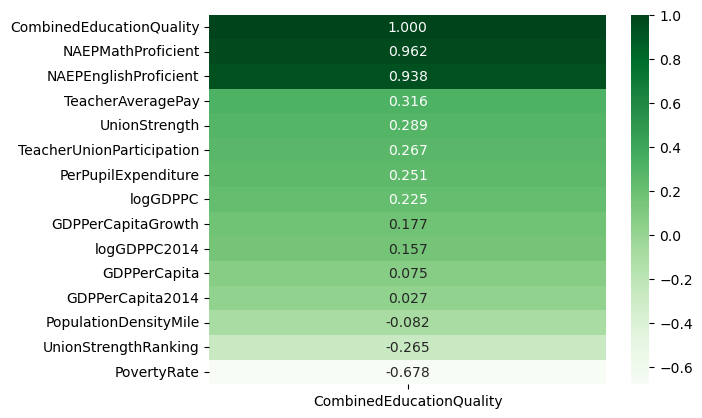

In [7]:
sns.heatmap(data=indexdf.corr()[['CombinedEducationQuality']].sort_values(by='CombinedEducationQuality', ascending=False), cbar=True, annot=True,fmt=f'.3f', cmap='Greens')

<Axes: >

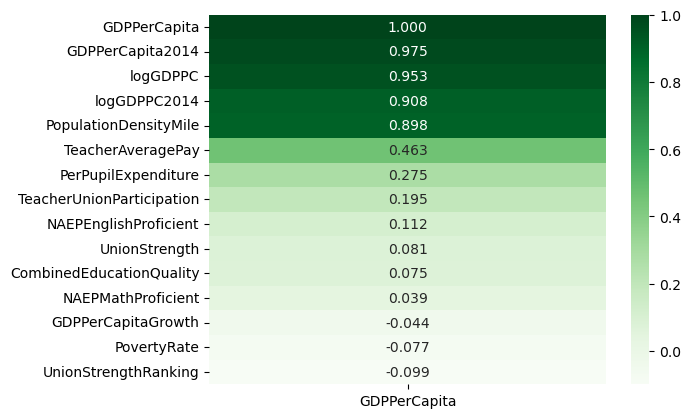

In [8]:
sns.heatmap(data=indexdf.corr()[['GDPPerCapita']].sort_values(by='GDPPerCapita', ascending=False), cbar=True, annot=True,fmt=f'.3f', cmap='Greens')

<Axes: >

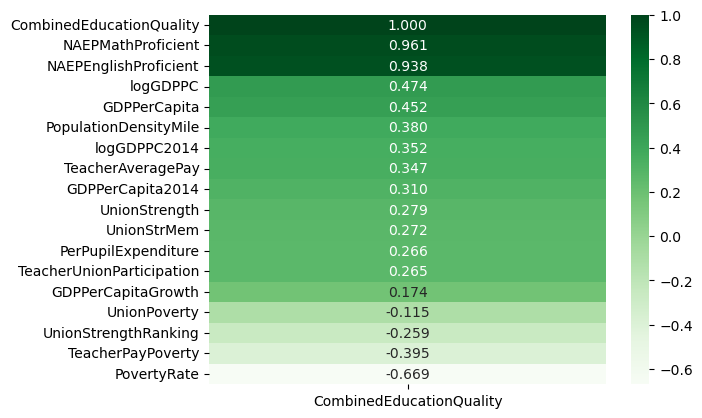

In [9]:
sns.heatmap(data=cleandf.corr()[['CombinedEducationQuality']].sort_values(by='CombinedEducationQuality', ascending=False), cbar=True, annot=True,fmt=f'.3f', cmap='Greens')

<Axes: >

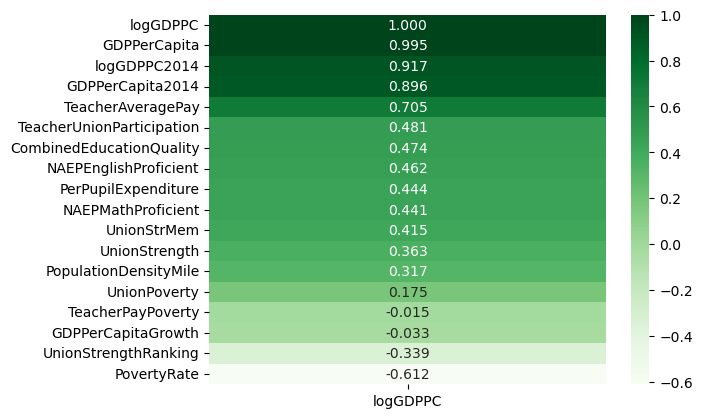

In [10]:
sns.heatmap(data=cleandf.corr()[['logGDPPC']].sort_values(by='logGDPPC', ascending=False), cbar=True, annot=True,fmt=f'.3f', cmap='Greens')

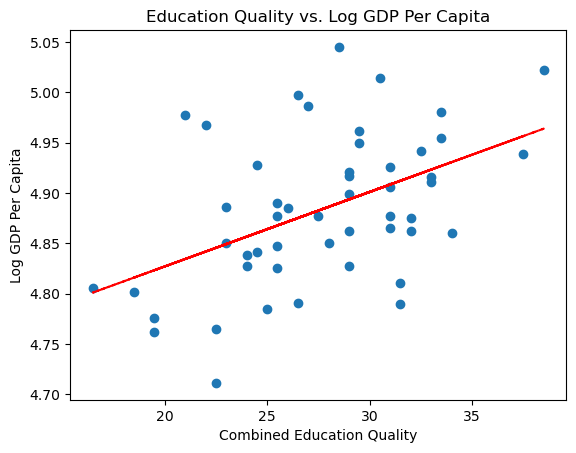

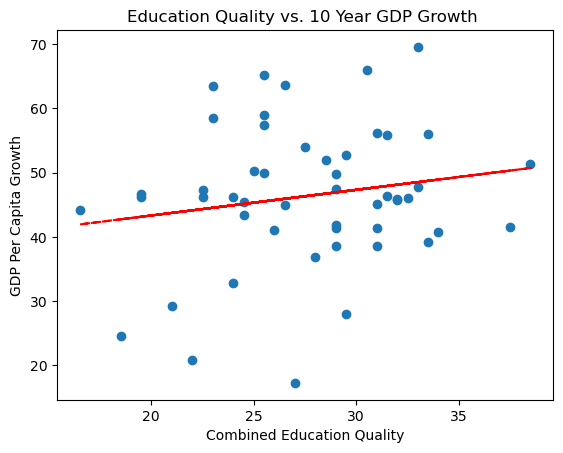

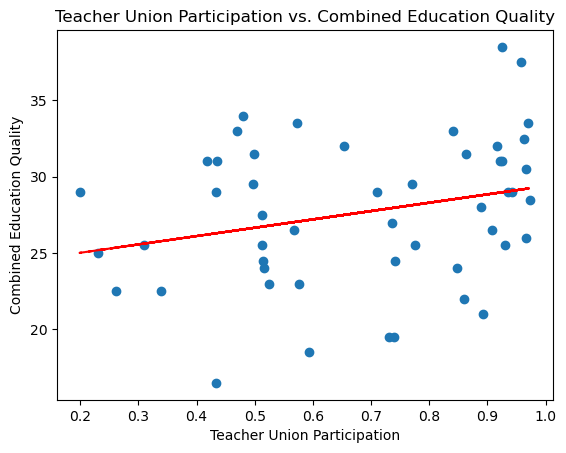

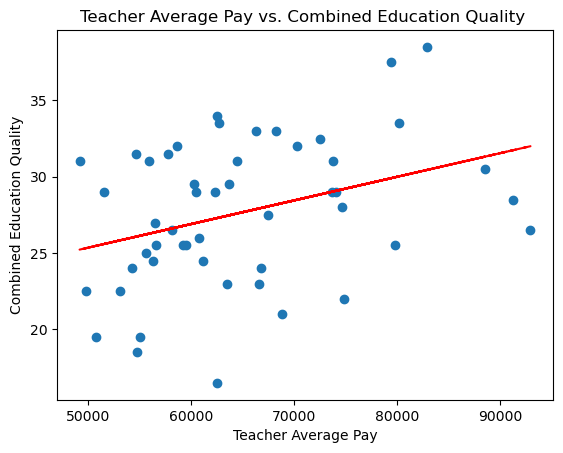

In [11]:
#Education v logGDP
x = cleandf['CombinedEducationQuality']
y = cleandf['logGDPPC']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel("Combined Education Quality")
plt.ylabel("Log GDP Per Capita")
plt.title("Education Quality vs. Log GDP Per Capita")
plt.show()

#Education v Growth
x = cleandf['CombinedEducationQuality']
y = cleandf['GDPPerCapitaGrowth']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel("Combined Education Quality")
plt.ylabel("GDP Per Capita Growth")
plt.title("Education Quality vs. 10 Year GDP Growth ")
plt.show()

#Union v Education
x = cleandf['TeacherUnionParticipation']
y = cleandf['CombinedEducationQuality']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel("Teacher Union Participation")
plt.ylabel("Combined Education Quality")
plt.title("Teacher Union Participation vs. Combined Education Quality")
plt.show()

#Pay v Education
x = cleandf['TeacherAveragePay']
y = cleandf['CombinedEducationQuality']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel("Teacher Average Pay")
plt.ylabel("Combined Education Quality")
plt.title("Teacher Average Pay vs. Combined Education Quality ")
plt.show()

In [67]:
cleandf[['UnionStrength','TeacherUnionParticipation']].corr()

,UnionStrength,TeacherUnionParticipation
UnionStrength,1.000000,0.835302
TeacherUnionParticipation,0.835302,1.000000


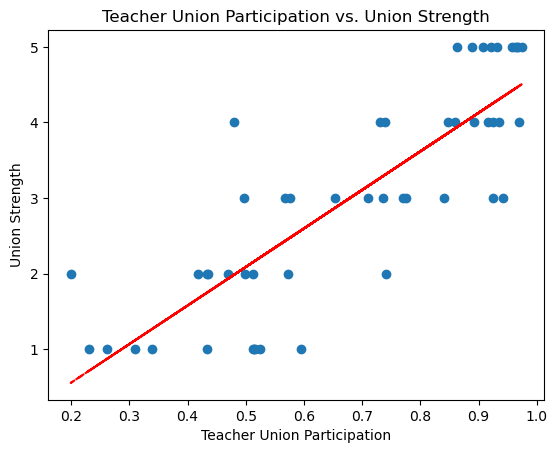

In [68]:
x = cleandf['TeacherUnionParticipation']
y = cleandf['UnionStrength']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel("Teacher Union Participation")
plt.ylabel("Union Strength")
plt.title("Teacher Union Participation vs. Union Strength")
plt.show()

In [12]:
y = cleandf['CombinedEducationQuality']
x = ['TeacherUnionParticipation', 'TeacherAveragePay', 'PovertyRate', 'PopulationDensityMile','PerPupilExpenditure','UnionStrengthRanking']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cleandf[x])

model = LinearRegression()
model.fit(X_scaled,y)
model.score(X_scaled,y)

0.5411742824964605

In [13]:
y = cleandf['GDPPerCapita']
x = ['UnionStrMem','TeacherUnionParticipation', 'TeacherAveragePay', 'PovertyRate', 'PopulationDensityMile','PerPupilExpenditure','UnionStrengthRanking']
X_scaled = scaler.fit_transform(cleandf[x])
model = LinearRegression()
model.fit(X_scaled,y)
model.score(X_scaled,y)

0.6396118382786513

In [14]:
y = cleandf['logGDPPC']
x = ['UnionStrMem','logGDPPC2014','TeacherUnionParticipation', 'TeacherAveragePay', 'PovertyRate', 'PopulationDensityMile','PerPupilExpenditure','UnionStrengthRanking']
X_scaled = scaler.fit_transform(cleandf[x])
model = LinearRegression()
model.fit(X_scaled,y)
model.score(X_scaled,y)


0.928039056529555

In [15]:
def bootstrap_coefs(data, formula_vars, R=3000):
    """
    data: full pandas DataFrame
    formula_vars: tuple/list containing (y_column, X_columns)
    R: number of bootstrap samples
    """
    
    y_col, X_cols = formula_vars
    coefs = []

    n = len(data)

    for _ in range(R):
        # sample row indices with replacement
        sample_idx = np.random.choice(n, n, replace=True)
        sample = data.iloc[sample_idx]

        y_boot = sample[y_col]
        X_boot = sm.add_constant(sample[X_cols])

        # fit OLS
        try:
            boot_model = sm.OLS(y_boot, X_boot).fit()
            coefs.append(boot_model.params)
        except:
            pass  # skip iterations that fail to converge

    return pd.DataFrame(coefs)


In [16]:
#COMBINED EDUCATION QUALITY

In [72]:
boot_results = bootstrap_coefs(
    cleandf,
    ('CombinedEducationQuality', ['TeacherPayPoverty','UnionStrength','TeacherUnionParticipation', 'PopulationDensityMile','GDPPerCapita']),
    R=3000
)

ci_lower = boot_results.quantile(0.05)
ci_upper = boot_results.quantile(0.95)

ci_df = pd.DataFrame({
    'coef': boot_results.mean(),
    'CI_lower': ci_lower,
    'CI_upper': ci_upper
})

print(ci_df)

                                coef   CI_lower   CI_upper
const                      29.249869  23.705716  35.920482
TeacherPayPoverty          -0.000015  -0.000019  -0.000010
UnionStrength               1.162959   0.111760   2.095988
TeacherUnionParticipation  -6.446572 -11.930112  -0.452812
PopulationDensityMile       0.006420   0.002396   0.010425
GDPPerCapita                0.000126   0.000049   0.000197


In [73]:
# Compute standard deviation of x and y
x = cleandf[['TeacherPayPoverty','UnionStrength','TeacherUnionParticipation', 'PopulationDensityMile','GDPPerCapita']]
y = cleandf['CombinedEducationQuality']
x_std = x.std()
y_std = y.std()

# Drop constant before scaling
coef_names = boot_results.columns.drop('const')

boot_results_std = boot_results.copy()
for col in coef_names:
    boot_results_std[col] = boot_results[col] * (x_std[col] / y_std)

# Standardize constant to zero
boot_results_std['const'] = 0

boot_ci_std = boot_results_std.quantile([0.05, 0.95])
boot_ci_std.index = ["lower", "upper"]
print(boot_ci_std)


       const  TeacherPayPoverty  UnionStrength  TeacherUnionParticipation  \
lower    0.0          -0.629549       0.033037                  -0.577634   
upper    0.0          -0.345767       0.619586                  -0.021924   

       PopulationDensityMile  GDPPerCapita  
lower               0.137105      0.139187  
upper               0.596444      0.555552  


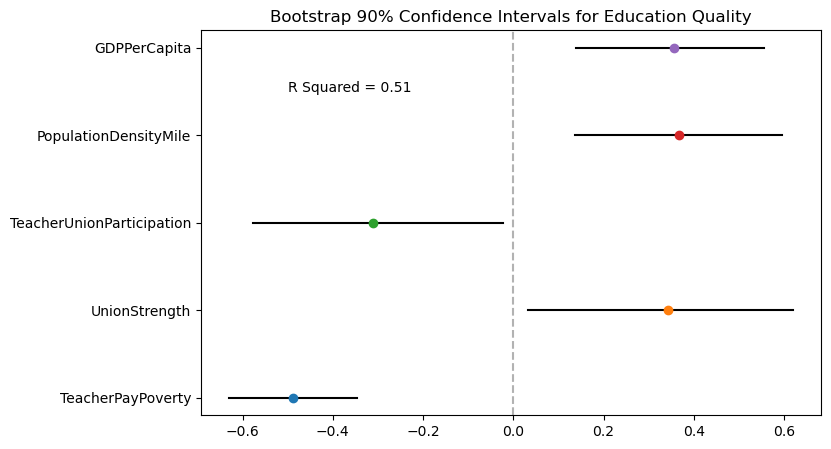

In [74]:
fig, ax = plt.subplots(figsize=(8,5))
for i, coef in enumerate(coef_names):
    estimate = boot_results_std[coef].mean()  # mean of bootstraps
    lower = boot_ci_std.loc["lower", coef]
    upper = boot_ci_std.loc["upper", coef]
    
    ax.plot([lower, upper], [i, i], 'k-')  # CI line
    ax.plot(estimate, i, 'o')              # point estimate

ax.set_yticks(range(len(coef_names)))
ax.set_yticklabels(coef_names)
ax.axvline(0, color='grey', linestyle='--', alpha=0.6)
plt.title("Bootstrap 90% Confidence Intervals for Education Quality")
ax.annotate('R Squared = 0.51', xy=(-0.5, 3.5), xytext=(-0.5, 3.5))
plt.show()

In [20]:
# Mean of bootstrapped coefficients
coef_mean = boot_results.mean()

# Add constant to X
import statsmodels.api as sm
X_design = sm.add_constant(x)  # same as your predictors

# Predicted values
y_pred = X_design.dot(coef_mean)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE using mean bootstrap coefficients:", rmse)

RMSE using mean bootstrap coefficients: 3.3260609694113272


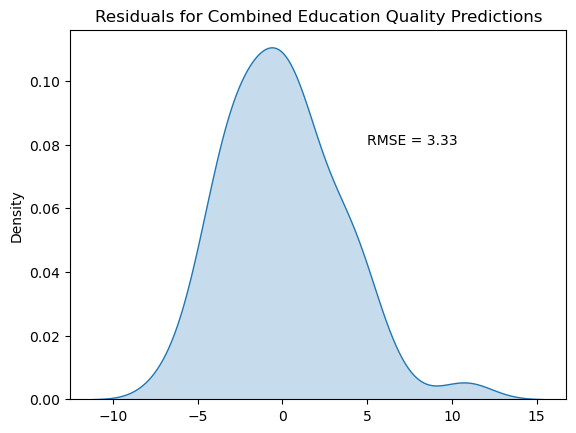

In [21]:
resid = y_pred - cleandf['CombinedEducationQuality']
ax = sns.kdeplot(data=resid, fill=True)
plt.title('Residuals for Combined Education Quality Predictions')
ax.annotate('RMSE = 3.33', xy=(5, 0.08), xytext=(5, 0.08))
plt.show()

In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print("R²:", r2)



R²: 0.5116762495479281


In [23]:
#LOG GDP PER CAPITA

In [78]:
boot_results = bootstrap_coefs(
    cleandf,
    ('logGDPPC', ['logGDPPC2014', 'TeacherAveragePay','PovertyRate','UnionStrength']),
    R=3000
)

ci_lower = boot_results.quantile(0.05)
ci_upper = boot_results.quantile(0.95)

ci_df = pd.DataFrame({
    'coef': boot_results.mean(),
    'CI_lower': ci_lower,
    'CI_upper': ci_upper
})

print(ci_df)

                       coef  CI_lower  CI_upper
const              1.819267  1.392122  2.185521
logGDPPC2014       0.636988  0.560591  0.729931
TeacherAveragePay  0.000002  0.000001  0.000003
PovertyRate       -0.004551 -0.006879 -0.002209
UnionStrength     -0.007168 -0.011564 -0.003143


In [79]:
# Compute standard deviation of X and y
x = cleandf[['logGDPPC2014', 'TeacherAveragePay', 'PovertyRate','UnionStrength']]
y = cleandf['logGDPPC']
x_std = x.std()
y_std = y.std()

# Drop constant before scaling
coef_names = boot_results.columns.drop('const')

boot_results_std = boot_results.copy()
for col in coef_names:
    boot_results_std[col] = boot_results[col] * (x_std[col] / y_std)

# Standardize constant to zero 
boot_results_std['const'] = 0

boot_ci_std = boot_results_std.quantile([0.05, 0.95])
boot_ci_std.index = ["lower", "upper"]
print(boot_ci_std)


       const  logGDPPC2014  TeacherAveragePay  PovertyRate  UnionStrength
lower    0.0      0.625385           0.186218    -0.242398      -0.218570
upper    0.0      0.814299           0.402363    -0.077851      -0.059406


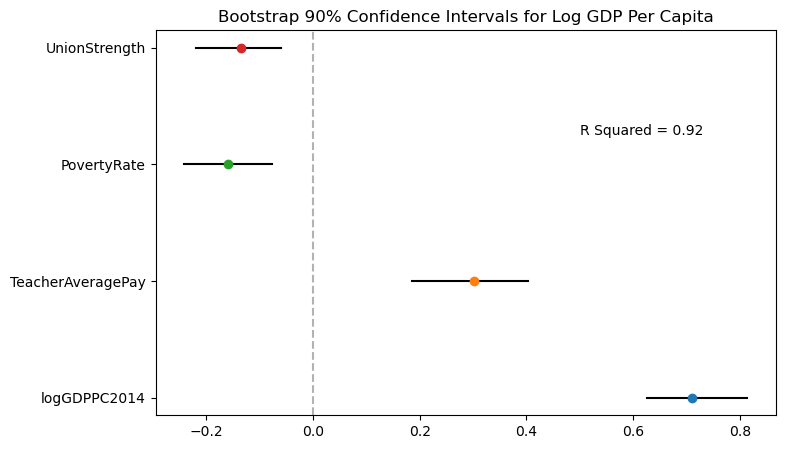

In [80]:
coef_names = boot_results_std.columns.drop('const')

fig, ax = plt.subplots(figsize=(8,5))
for i, coef in enumerate(coef_names):
    estimate = boot_results_std[coef].mean()  # mean of bootstraps
    lower = boot_ci_std.loc["lower", coef]
    upper = boot_ci_std.loc["upper", coef]
    
    ax.plot([lower, upper], [i, i], 'k-')  # CI line
    ax.plot(estimate, i, 'o')              # point estimate

ax.set_yticks(range(len(coef_names)))
ax.set_yticklabels(coef_names)
ax.axvline(0, color='grey', linestyle='--', alpha=0.6)
plt.title("Bootstrap 90% Confidence Intervals for Log GDP Per Capita")
ax.annotate('R Squared = 0.92', xy=(0.5, 2.25), xytext=(0.5, 2.25))
plt.show()

In [64]:
#Mean of bootstrapped coefficients
coef_mean = boot_results.mean()

#Add constant to X
import statsmodels.api as sm
X_design = sm.add_constant(x)  # same as your predictors

#Predicted values
y_pred = X_design.dot(coef_mean)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE using mean bootstrap coefficients:", rmse)

RMSE using mean bootstrap coefficients: 0.021604815652579185


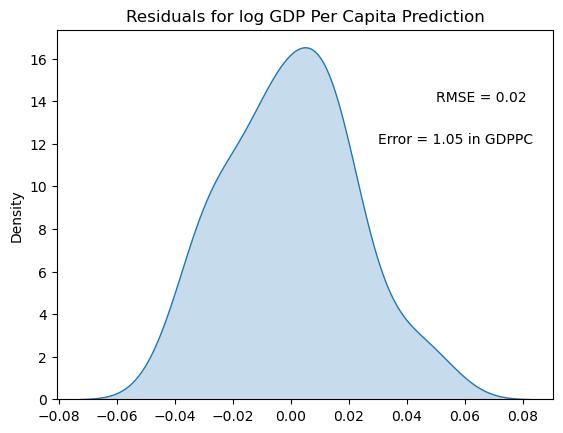

In [65]:
resid = y_pred - cleandf['logGDPPC']
ax = sns.kdeplot(data=resid, fill=True)
plt.title('Residuals for log GDP Per Capita Prediction')
ax.annotate('RMSE = 0.02', xy=(0.05, 14), xytext=(0.05, 14))
ax.annotate('Error = 1.05 in GDPPC', xy=(0.03, 12), xytext=(0.03, 12))
plt.show()

In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print("R²:", r2)



R²: 0.9157590261144053


In [ ]:
#WHY I USED LOG: PROOF

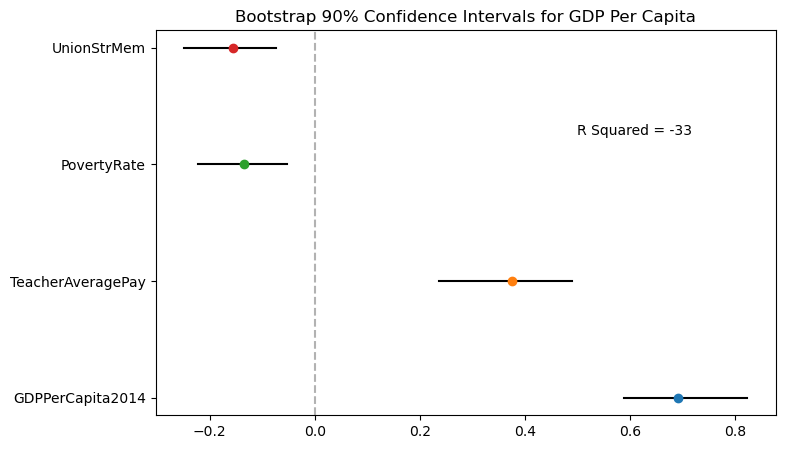

In [55]:
boot_results = bootstrap_coefs(
    cleandf,
    ('GDPPerCapita', ['GDPPerCapita2014', 'TeacherAveragePay','PovertyRate','UnionStrMem']),
    R=3000
)

ci_lower = boot_results.quantile(0.05)
ci_upper = boot_results.quantile(0.95)

ci_df = pd.DataFrame({
    'coef': boot_results.mean(),
    'CI_lower': ci_lower,
    'CI_upper': ci_upper
})

# Compute standard deviation of X and y
x = cleandf[['GDPPerCapita2014', 'TeacherAveragePay', 'PovertyRate','UnionStrMem']]
y = cleandf['GDPPerCapita']
x_std = x.std()
y_std = y.std()

# Drop constant before scaling
coef_names = boot_results.columns.drop('const')

boot_results_std = boot_results.copy()
for col in coef_names:
    boot_results_std[col] = boot_results[col] * (x_std[col] / y_std)

#Standardize constant to zero 
boot_results_std['const'] = 0

boot_ci_std = boot_results_std.quantile([0.05, 0.95])
boot_ci_std.index = ["lower", "upper"]

coef_names = boot_results_std.columns.drop('const')

fig, ax = plt.subplots(figsize=(8,5))
for i, coef in enumerate(coef_names):
    estimate = boot_results_std[coef].mean()  # mean of bootstraps
    lower = boot_ci_std.loc["lower", coef]
    upper = boot_ci_std.loc["upper", coef]
    
    ax.plot([lower, upper], [i, i], 'k-')  # CI line
    ax.plot(estimate, i, 'o')              # point estimate

ax.set_yticks(range(len(coef_names)))
ax.set_yticklabels(coef_names)
ax.axvline(0, color='grey', linestyle='--', alpha=0.6)
plt.title("Bootstrap 90% Confidence Intervals for GDP Per Capita")
ax.annotate('R Squared = -33', xy=(0.5, 2.25), xytext=(0.5, 2.25))
plt.show()

In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print("R²:", r2)


R²: -33.5379231553127


In [30]:
#GDP GROWTH

<Axes: >

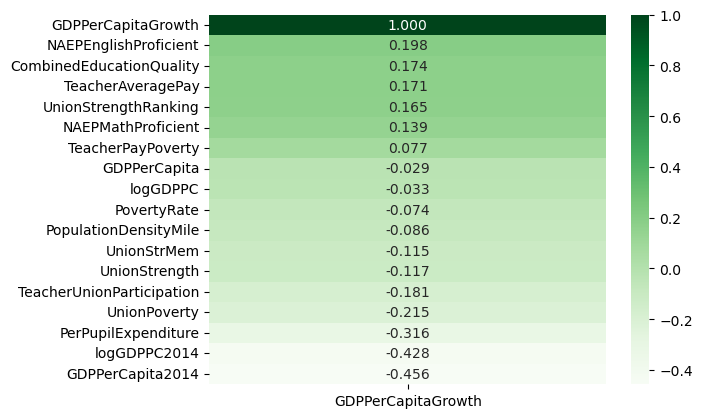

In [31]:
sns.heatmap(data=cleandf.corr()[['GDPPerCapitaGrowth']].sort_values(by='GDPPerCapitaGrowth', ascending=False), cbar=True, annot=True,fmt=f'.3f', cmap='Greens')

In [32]:
boot_results = bootstrap_coefs(
    cleandf,
    ('GDPPerCapitaGrowth', ['GDPPerCapita2014','CombinedEducationQuality','TeacherUnionParticipation', 'TeacherAveragePay', 'PovertyRate','UnionStrengthRanking']),
    R=3000
)

ci_lower = boot_results.quantile(0.05)
ci_upper = boot_results.quantile(0.95)

ci_df = pd.DataFrame({
    'coef': boot_results.mean(),
    'CI_lower': ci_lower,
    'CI_upper': ci_upper
})

print(ci_df)

                                coef   CI_lower   CI_upper
const                      56.268960  25.788458  87.137573
GDPPerCapita2014           -0.000854  -0.001053  -0.000653
CombinedEducationQuality    0.259482  -0.221037   0.719280
TeacherUnionParticipation -10.603480 -29.276787   6.781677
TeacherAveragePay           0.000711   0.000415   0.000960
PovertyRate                -1.103344  -1.969070  -0.146417
UnionStrengthRanking        0.135760  -0.123469   0.380921


In [33]:
# Compute standard deviation of X and y
x = cleandf[['GDPPerCapita2014','CombinedEducationQuality','TeacherUnionParticipation', 'TeacherAveragePay', 'PovertyRate','UnionStrengthRanking']]
y = cleandf['GDPPerCapitaGrowth']
x_std = x.std()
y_std = y.std()

# Drop constant before scaling
coef_names = boot_results.columns.drop('const')

boot_results_std = boot_results.copy()
for col in coef_names:
    boot_results_std[col] = boot_results[col] * (x_std[col] / y_std)

# Standardize constant to zero
boot_results_std['const'] = 0

boot_ci_std = boot_results_std.quantile([0.05, 0.95])
boot_ci_std.index = ["lower", "upper"]
print(boot_ci_std)

       const  GDPPerCapita2014  CombinedEducationQuality  \
lower    0.0         -1.012710                 -0.096104   
upper    0.0         -0.628627                  0.312734   

       TeacherUnionParticipation  TeacherAveragePay  PovertyRate  \
lower                  -0.616324           0.404442    -0.471812   
upper                   0.142765           0.934723    -0.035083   

       UnionStrengthRanking  
lower             -0.167290  
upper              0.516116  


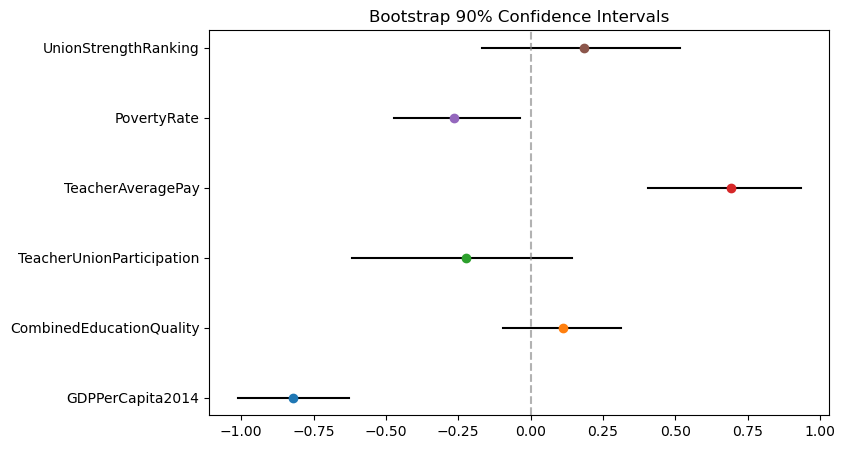

In [34]:
coef_names = boot_results_std.columns.drop('const')

fig, ax = plt.subplots(figsize=(8,5))
for i, coef in enumerate(coef_names):
    estimate = boot_results_std[coef].mean()  # mean of bootstraps
    lower = boot_ci_std.loc["lower", coef]
    upper = boot_ci_std.loc["upper", coef]
    
    ax.plot([lower, upper], [i, i], 'k-')  # CI line
    ax.plot(estimate, i, 'o')              # point estimate

ax.set_yticks(range(len(coef_names)))
ax.set_yticklabels(coef_names)
ax.axvline(0, color='grey', linestyle='--', alpha=0.6)
plt.title("Bootstrap 90% Confidence Intervals")
plt.show()

In [35]:
# Mean of bootstrapped coefficients
coef_mean = boot_results.mean()

# Add constant to X
import statsmodels.api as sm
X_design = sm.add_constant(x)  # same as your predictors

# Predicted values
y_pred = X_design.dot(coef_mean)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE using mean bootstrap coefficients:", rmse)

RMSE using mean bootstrap coefficients: 6.831594571771276


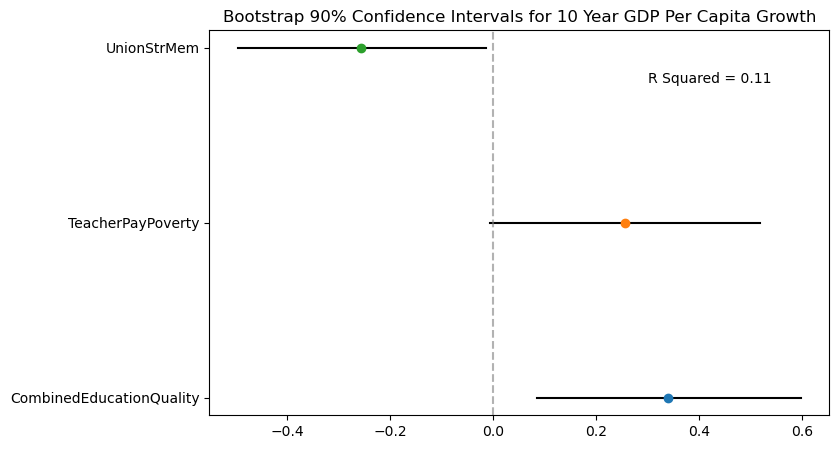

In [36]:
boot_results = bootstrap_coefs(
    cleandf,
    ('GDPPerCapitaGrowth', ['CombinedEducationQuality','TeacherPayPoverty','UnionStrMem']),
    R=3000
)

ci_lower = boot_results.quantile(0.05)
ci_upper = boot_results.quantile(0.95)

ci_df = pd.DataFrame({
    'coef': boot_results.mean(),
    'CI_lower': ci_lower,
    'CI_upper': ci_upper
})

# Compute standard deviation of X and y
x = cleandf[['CombinedEducationQuality','TeacherPayPoverty','UnionStrMem']]
y = cleandf['GDPPerCapitaGrowth']
x_std = x.std()
y_std = y.std()

# Drop constant before scaling
coef_names = boot_results.columns.drop('const')

boot_results_std = boot_results.copy()
for col in coef_names:
    boot_results_std[col] = boot_results[col] * (x_std[col] / y_std)

#standardize constant to zero 
boot_results_std['const'] = 0

boot_ci_std = boot_results_std.quantile([0.05, 0.95])
boot_ci_std.index = ["lower", "upper"]

coef_names = boot_results_std.columns.drop('const')

fig, ax = plt.subplots(figsize=(8,5))
for i, coef in enumerate(coef_names):
    estimate = boot_results_std[coef].mean()  # mean of bootstraps
    lower = boot_ci_std.loc["lower", coef]
    upper = boot_ci_std.loc["upper", coef]
    
    ax.plot([lower, upper], [i, i], 'k-')  # CI line
    ax.plot(estimate, i, 'o')              # point estimate

ax.set_yticks(range(len(coef_names)))
ax.set_yticklabels(coef_names)
ax.axvline(0, color='grey', linestyle='--', alpha=0.6)
plt.title("Bootstrap 90% Confidence Intervals for 10 Year GDP Per Capita Growth")
ax.annotate('R Squared = 0.11', xy=(0.3, 1.8), xytext=(0.3, 1.8))
plt.show()


In [37]:
# Mean of bootstrapped coefficients
coef_mean = boot_results.mean()

# Add constant to X
import statsmodels.api as sm
X_design = sm.add_constant(x)  # same as your predictors

# Predicted values
y_pred = X_design.dot(coef_mean)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE using mean bootstrap coefficients:", rmse)

RMSE using mean bootstrap coefficients: 10.344628187549377


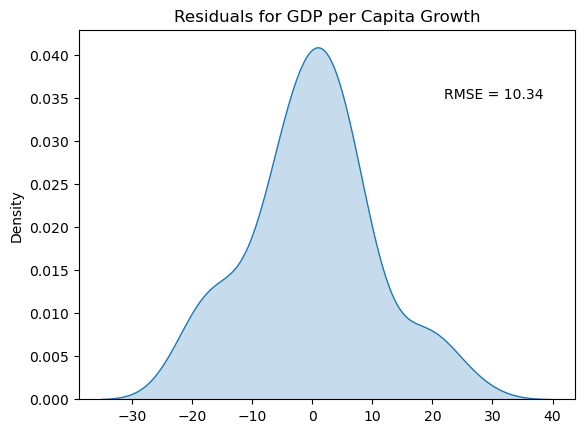

In [38]:
resid = y_pred - cleandf['GDPPerCapitaGrowth']
ax = sns.kdeplot(data=resid, fill=True)
plt.title('Residuals for GDP per Capita Growth')
ax.annotate('RMSE = 10.34', xy=(22, 0.035), xytext=(22, 0.035))
plt.show()

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print("R²:", r2)



R²: 0.10704017362505913
